In [82]:
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.stats.multicomp as mc
from scipy.stats import f_oneway
import statsmodels.api as sm
import numpy as np


In [2]:
# Get the current working directory path
cwd = os.getcwd()

# Get the path to the data directory
data_path = os.path.dirname(os.path.abspath(cwd)) + "/data"
print(data_path)

/Users/jiayan/Downloads/codes_macs_2022-2023/macs30200/replication-materials-jiayanli/data


In [3]:
# read csv
df_clean = pd.read_csv(data_path + "/clean_data.csv")

df_clean.head()

,Period,Username,Date,URL,Content,TweetID,MentionedUsers,Longitude,Latitude,CountryCode,Place,UserID,FollowersCount,UserDescription,UserURL
0,0,tewillmott,2019-08-14T23:59:42+00:00,https://twitter.com/tewillmott/status/11617895...,motivation sweat today smile tomorrow,1161789524902440960,NaN,NaN,NaN,NaN,NaN,2378977625,239,Make up artist for film and television. Also ...,https://twitter.com/tewillmott
1,0,tewillmott,2019-08-14T23:50:39+00:00,https://twitter.com/tewillmott/status/11617872...,time kill fat,1161787246460096512,NaN,NaN,NaN,NaN,NaN,2378977625,239,Make up artist for film and television. Also ...,https://twitter.com/tewillmott
2,0,tewillmott,2019-08-14T23:45:06+00:00,https://twitter.com/tewillmott/status/11617858...,challenge every day,1161785852357308416,NaN,NaN,NaN,NaN,NaN,2378977625,239,Make up artist for film and television. Also ...,https://twitter.com/tewillmott
3,0,tewillmott,2019-08-14T23:40:11+00:00,https://twitter.com/tewillmott/status/11617846...,excuse dont burn calorie fitnessmodel,1161784615822155777,NaN,NaN,NaN,NaN,NaN,2378977625,239,Make up artist for film and television. Also ...,https://twitter.com/tewillmott
4,0,tewillmott,2019-08-14T23:36:21+00:00,https://twitter.com/tewillmott/status/11617836...,let get leg right fitnessmodel,1161783648443482112,NaN,NaN,NaN,NaN,NaN,2378977625,239,Make up artist for film and television. Also ...,https://twitter.com/tewillmott


# Sentiment Analysis

## VADER Sentiment Analysis

In [4]:
# Download VADER lexicon
# nltk.download('vader_lexicon')

# Initialize VADER analyzer
sid = SentimentIntensityAnalyzer()

In [5]:
# Define a function to apply the analyzer to each tweet and return the sentiment score
def get_sentiment_score(tweet):
    scores = sid.polarity_scores(tweet)
    return scores['compound']

# Apply the function to each tweet in the dataset and add the sentiment score as a new column
df_clean['sentiment_score'] = df_clean['Content'].apply(get_sentiment_score)

In [6]:
# Define a function to label each tweet as positive, negative, or neutral based on the sentiment score
def get_sentiment_label(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to each sentiment score and add the sentiment label as a new column
df_clean['sentiment_label'] = df_clean['sentiment_score'].apply(get_sentiment_label)

In [7]:
df_clean.head()

,Period,Username,Date,URL,Content,TweetID,MentionedUsers,Longitude,Latitude,CountryCode,Place,UserID,FollowersCount,UserDescription,UserURL,sentiment_score,sentiment_label
0,0,tewillmott,2019-08-14T23:59:42+00:00,https://twitter.com/tewillmott/status/11617895...,motivation sweat today smile tomorrow,1161789524902440960,NaN,NaN,NaN,NaN,NaN,2378977625,239,Make up artist for film and television. Also ...,https://twitter.com/tewillmott,0.5994,positive
1,0,tewillmott,2019-08-14T23:50:39+00:00,https://twitter.com/tewillmott/status/11617872...,time kill fat,1161787246460096512,NaN,NaN,NaN,NaN,NaN,2378977625,239,Make up artist for film and television. Also ...,https://twitter.com/tewillmott,-0.6908,negative
2,0,tewillmott,2019-08-14T23:45:06+00:00,https://twitter.com/tewillmott/status/11617858...,challenge every day,1161785852357308416,NaN,NaN,NaN,NaN,NaN,2378977625,239,Make up artist for film and television. Also ...,https://twitter.com/tewillmott,0.0772,positive
3,0,tewillmott,2019-08-14T23:40:11+00:00,https://twitter.com/tewillmott/status/11617846...,excuse dont burn calorie fitnessmodel,1161784615822155777,NaN,NaN,NaN,NaN,NaN,2378977625,239,Make up artist for film and television. Also ...,https://twitter.com/tewillmott,0.0772,positive
4,0,tewillmott,2019-08-14T23:36:21+00:00,https://twitter.com/tewillmott/status/11617836...,let get leg right fitnessmodel,1161783648443482112,NaN,NaN,NaN,NaN,NaN,2378977625,239,Make up artist for film and television. Also ...,https://twitter.com/tewillmott,0.0000,neutral


## Check between-period difference

Based on the descriptive data above, we can observe that the mean compound score of sentiment is highest for late-pandemic fitpiration tweets, followed by pre-pandemic and then early-pandemic. This suggests that, on average, late-pandemic fitpiration tweets are more positive than pre-pandemic ones, with early-pandemic tweets being the least optimistic.

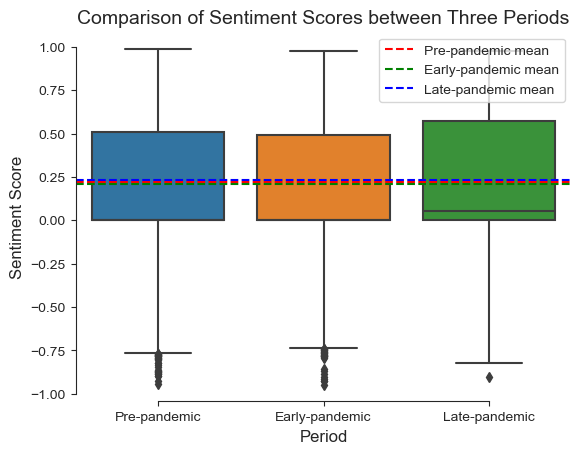

In [4]:
# Create a box plot to compare the three groups
sns.set_style("ticks")
ax = sns.boxplot(x='Period', y='sentiment_score', data=df_clean)
sns.despine(trim=True)
sns.set_palette("Set2")

# Set the x-axis tick labels
ax.set_xticklabels(['Pre-pandemic', 'Early-pandemic', 'Late-pandemic'])

# Calculate the mean of each group
means = df_clean.groupby('Period')['sentiment_score'].mean()

# Add horizontal lines for the mean of each group
plt.axhline(y=means[0], color='r', linestyle='--', label='Pre-pandemic mean')
plt.axhline(y=means[1], color='g', linestyle='--', label='Early-pandemic mean')
plt.axhline(y=means[2], color='b', linestyle='--', label='Late-pandemic mean')

# Add a title and axis labels
plt.title('Comparison of Sentiment Scores between Three Periods', fontsize=14)
plt.xlabel('Period', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)

# Save the figure
plt.savefig('sentiment_scores.png', dpi=300, bbox_inches='tight')

# Add the legend
plt.legend()

# Show the plot
plt.show()

In [17]:
# Save a copy of data with the sentiment scores
df_clean.to_csv('sentiment_temp.csv', index=False)

ANOVA (Analysis of Variance) test to determine whether there is a statistically significant difference between the three groups

In [60]:
# Extract the sentiment scores for each period
period_0 = df_clean[df_clean['Period'] == 0]['sentiment_score']
period_1 = df_clean[df_clean['Period'] == 1]['sentiment_score']
period_2 = df_clean[df_clean['Period'] == 2]['sentiment_score']

# Perform an ANOVA test
f_stat, p_value = f_oneway(period_0, period_1, period_2)

print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 2.8289735993699754
p-value: 0.05909777784306111


p-value is right on edge of the chosen significance level (0.05). Therefore, I performed post-hoc tests (Tukey's HSD) to determine which pairs of groups have a significant difference in means.

In [67]:
# Define the groups to compare
groups = [0, 1, 2]

# Create a list of Series—the sentiment scores for each group
data = [df_clean[df_clean['Period'] == i]['sentiment_score'] for i in groups]

# Perform Tukey's HSD test
tukey = mc.MultiComparison(np.concatenate(data), 
                           np.concatenate([np.zeros(len(data[i])) + i 
                                           for i in range(len(data))]))
result = tukey.tukeyhsd()

# Print the results
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   0.0    1.0  -0.0106 0.1504  -0.024 0.0028  False
   0.0    2.0   0.0113 0.5109 -0.0126 0.0352  False
   1.0    2.0   0.0219 0.1019 -0.0032  0.047  False
---------------------------------------------------


The Tukey HSD test has found that there is no significant difference between groups 0 and 1 (p-adj = 0.1504), no significant difference between groups 0 and 2 (p-adj = 0.5109), and no significant difference between groups 1 and 2 (p-adj = 0.1019).

## Check in-period trends

In [86]:
df_clean.groupby('Period').sentiment_score.describe()

,count,mean,std,min,25%,50%,75%,max
Period,,,,,,,,
0,11961.0,0.220345,0.362536,-0.9423,0.0,0.0000,0.5106,0.9911
1,6071.0,0.209718,0.357862,-0.9468,0.0,0.0000,0.4939,0.9796
2,1409.0,0.231629,0.381496,-0.9022,0.0,0.0516,0.5719,0.9753


Significant period for Period 1: (Timestamp('2020-03-01 00:03:38+0000', tz='UTC'), Timestamp('2020-12-25 23:44:34+0000', tz='UTC'))


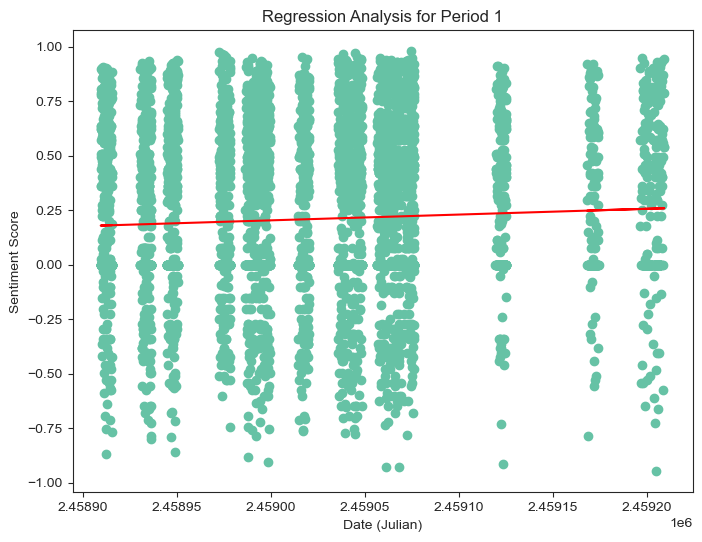

                 start_date                  end_date     slope   intercept  \
0 2019-03-01 00:00:55+00:00 2019-12-18 23:54:26+00:00  0.000060 -147.354467   
1 2020-03-01 00:03:38+00:00 2020-12-25 23:44:34+00:00  0.000265 -650.998261   
2 2022-03-01 05:08:27+00:00 2022-12-18 23:00:53+00:00  0.000058 -141.587279   

     rvalue    pvalue    stderr  
0  0.000178  0.144051  0.000041  
1  0.002753  0.000043  0.000065  
2  0.000174  0.620801  0.000117  


In [98]:
# create a new DataFrame to store the results
results = pd.DataFrame(columns=['start_date', 'end_date', 'slope', 'intercept', 'rvalue', 'pvalue', 'stderr'])

# loop through the groups and perform the regression analysis
for name, group in df_clean.groupby('Period'):
    group.set_index(group['Date'], inplace=True)
    if len(group.index) > 0:
        x = sm.add_constant(list(group.index.to_julian_date())) # convert date to Julian date and add constant
        y = list(group['sentiment_score'])

        model = sm.OLS(y, x, missing='drop')
        fitted = model.fit()
            
        results = results.append({'start_date': group.index.min(), 
                                'end_date': group.index.max(), 
                                'slope': fitted.params[1], 
                                'intercept': fitted.params[0], 
                                'rvalue': fitted.rsquared, 
                                'pvalue': fitted.pvalues[1], 
                                'stderr': fitted.bse[1]}, 
                                ignore_index=True)
        
        # check if the p-value is less than 0.05 (i.e., statistically significant)
        if fitted.pvalues[1] < 0.05:
            significant_period = (group.index.min(), group.index.max()) # get the start and end dates of the significant period
            print(f"Significant period for Period {name}: {significant_period}")
            
            # plot the scatter plot and regression line
            fig, ax = plt.subplots(figsize=(8,6))
            x = list(group.index.to_julian_date())
            ax.scatter(x, y)
            ax.plot(x, fitted.fittedvalues, color='red')

            # add labels and title
            ax.set_xlabel('Date (Julian)')
            ax.set_ylabel('Sentiment Score')
            ax.set_title(f'Regression Analysis for Period {name}')

            # show the plot
            plt.show()
# print the results
print(results)

Among the three identified periods, only the early-pandemic period displays a statistically significant increase in the sentiment score over time. However, the rate of increase is minimal.

## Check three-month periods

In [12]:
# convert the date column to datetime format
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

In [126]:
# group the dates into three-month periods
df_grouped = df_clean.groupby(pd.Grouper(key='Date', freq='3M'))

In [40]:
# Check the count of each time group
df_grouped['sentiment_score'].count()

Date
2019-03-31 00:00:00+00:00    1099
2019-06-30 00:00:00+00:00    2814
2019-09-30 00:00:00+00:00    4445
2019-12-31 00:00:00+00:00    3603
2020-03-31 00:00:00+00:00     928
2020-06-30 00:00:00+00:00    2301
2020-09-30 00:00:00+00:00    2358
2020-12-31 00:00:00+00:00     484
2021-03-31 00:00:00+00:00       0
2021-06-30 00:00:00+00:00       0
2021-09-30 00:00:00+00:00       0
2021-12-31 00:00:00+00:00       0
2022-03-31 00:00:00+00:00     115
2022-06-30 00:00:00+00:00     313
2022-09-30 00:00:00+00:00     455
2022-12-31 00:00:00+00:00     526
Freq: 3M, Name: sentiment_score, dtype: int64

### Check between-group differences

,mean,median,std
Date,,,
2019-03-31 00:00:00+00:00,0.212231,0.0000,0.363271
2019-06-30 00:00:00+00:00,0.224334,0.0000,0.361585
2019-09-30 00:00:00+00:00,0.210202,0.0000,0.359668
2019-12-31 00:00:00+00:00,0.232219,0.0516,0.366295
2020-03-31 00:00:00+00:00,0.196921,0.0000,0.360368
2020-06-30 00:00:00+00:00,0.192539,0.0000,0.350144
2020-09-30 00:00:00+00:00,0.219802,0.0000,0.358734
2020-12-31 00:00:00+00:00,0.266798,0.2129,0.378013
2022-03-31 00:00:00+00:00,0.154007,0.0000,0.375506


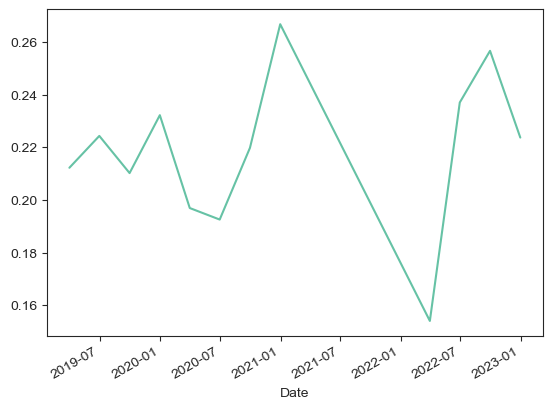

In [102]:
# Check the descriptive stats of the three-month periods
df_agg = df_grouped.agg(['mean', 'median', 'std'])['sentiment_score']
df_agg = df_agg[df_agg['mean'].isna() == False]
df_agg['mean'].plot()
df_agg

In [112]:
df_grouped.groups

{Timestamp('2019-03-31 00:00:00+0000', tz='UTC', freq='3M'): 1099,
 Timestamp('2019-06-30 00:00:00+0000', tz='UTC', freq='3M'): 3913,
 Timestamp('2019-09-30 00:00:00+0000', tz='UTC', freq='3M'): 8358,
 Timestamp('2019-12-31 00:00:00+0000', tz='UTC', freq='3M'): 11961,
 Timestamp('2020-03-31 00:00:00+0000', tz='UTC', freq='3M'): 12889,
 Timestamp('2020-06-30 00:00:00+0000', tz='UTC', freq='3M'): 15190,
 Timestamp('2020-09-30 00:00:00+0000', tz='UTC', freq='3M'): 17548,
 Timestamp('2020-12-31 00:00:00+0000', tz='UTC', freq='3M'): 18032,
 Timestamp('2021-03-31 00:00:00+0000', tz='UTC', freq='3M'): 18032,
 Timestamp('2021-06-30 00:00:00+0000', tz='UTC', freq='3M'): 18032,
 Timestamp('2021-09-30 00:00:00+0000', tz='UTC', freq='3M'): 18032,
 Timestamp('2021-12-31 00:00:00+0000', tz='UTC', freq='3M'): 18032,
 Timestamp('2022-03-31 00:00:00+0000', tz='UTC', freq='3M'): 18147,
 Timestamp('2022-06-30 00:00:00+0000', tz='UTC', freq='3M'): 18460,
 Timestamp('2022-09-30 00:00:00+0000', tz='UTC', fr

Text(0.5, 0, 'Period')

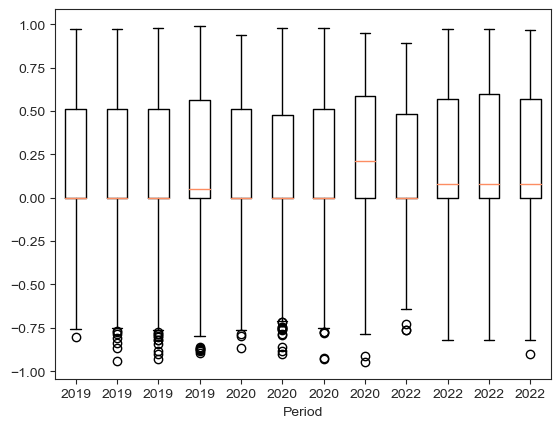

In [128]:
# create a list of sentiment scores for each period
periods = [group['sentiment_score'] for _, group in df_grouped if len(group) != 0]

# create a figure and axis object
fig, ax = plt.subplots()

# create the box plot
ax.boxplot(periods)

# set the labels and title
ax.set_xticklabels([key.year for key, group in df_grouped if len(group) != 0])
ax.set_xlabel('Period')

# Topic Modeling